In [1]:
import torch
import numpy as np
import pandas as pd
import h5py
import re
import warnings
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Set device (use MPS for Mac, CUDA for GPU, else CPU)
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

/Users/raunaqrai/miniconda_x86_64/envs/m2-coursework/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: mps


In [17]:
file_path = "../lotka_volterra_data.h5"

with h5py.File(file_path, "r") as f:
    trajectories = f["trajectories"][:]  # Shape: (1000, 100, 2)
    time_points = f["time"][:]  # Shape: (100,)

num_samples = 10  
data_dict = {
    "Time": np.tile(time_points, num_samples),
    "Prey Population": trajectories[:num_samples, :, 0].flatten(),
    "Predator Population": trajectories[:num_samples, :, 1].flatten(),
    "Sample ID": np.repeat(range(num_samples), len(time_points)),
}

df = pd.DataFrame(data_dict)

In [18]:
df

,Time,Prey Population,Predator Population,Sample ID
0,0.000000,0.949917,1.040624,0
1,2.020202,0.740551,0.779542,0
2,4.040404,0.682246,0.564390,0
3,6.060606,0.716674,0.407644,0
4,8.080808,0.824511,0.300283,0
...,...,...,...,...
995,191.919192,0.101669,0.417827,9
996,193.939394,0.102054,0.308723,9
997,195.959596,0.112150,0.228933,9
998,197.979798,0.131614,0.171448,9


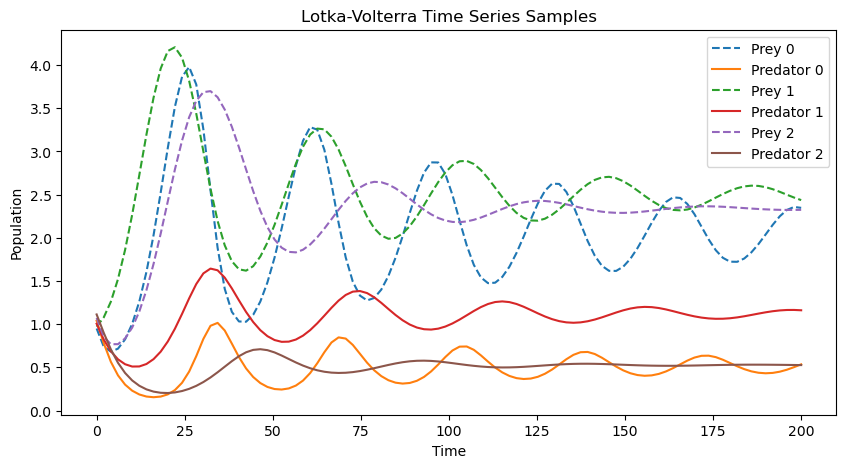

In [22]:
plt.figure(figsize=(10, 5))
for sample_id in range(3):
    sample_data = df[df["Sample ID"] == sample_id]
    plt.plot(sample_data["Time"], sample_data["Prey Population"], label=f"Prey {sample_id}", linestyle="dashed")
    plt.plot(sample_data["Time"], sample_data["Predator Population"], label=f"Predator {sample_id}")

plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Lotka-Volterra Time Series Samples")
plt.show()